<a href="https://colab.research.google.com/github/cielcs/Bayesian-inference/blob/main/MFCC%E3%81%A8%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 必要なライブラリをインストール

In [1]:
pip install librosa numpy

### mfcc

In [3]:
import librosa
import numpy as np

sound_path = '/content/drive/MyDrive/naist/Bsound/'

def extract_mfcc(wav_file, n_mfcc=13):
    # Load the WAV file
    y, sr = librosa.load(wav_file, sr=None)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Transpose the MFCCs to have time steps in rows and coefficients in columns
    mfccs = mfccs.T
    mfccs = np.mean(mfccs, axis=0)

    return mfccs

# Example usage
wav_file = sound_path + '5_29_1447.wav'  # Replace with your WAV file path
mfcc_features = extract_mfcc(wav_file)
print(mfcc_features.shape)
print(mfcc_features)


(13,)
[-838.7781     170.76062     64.31062     11.991164    19.38516
   24.630083     6.9358234   -2.3785737    9.3261795   19.81998
   16.687416    11.044291    10.134974 ]


### ディレクトリ内の全ての音声データに対してmfccを求め、主成分分析する

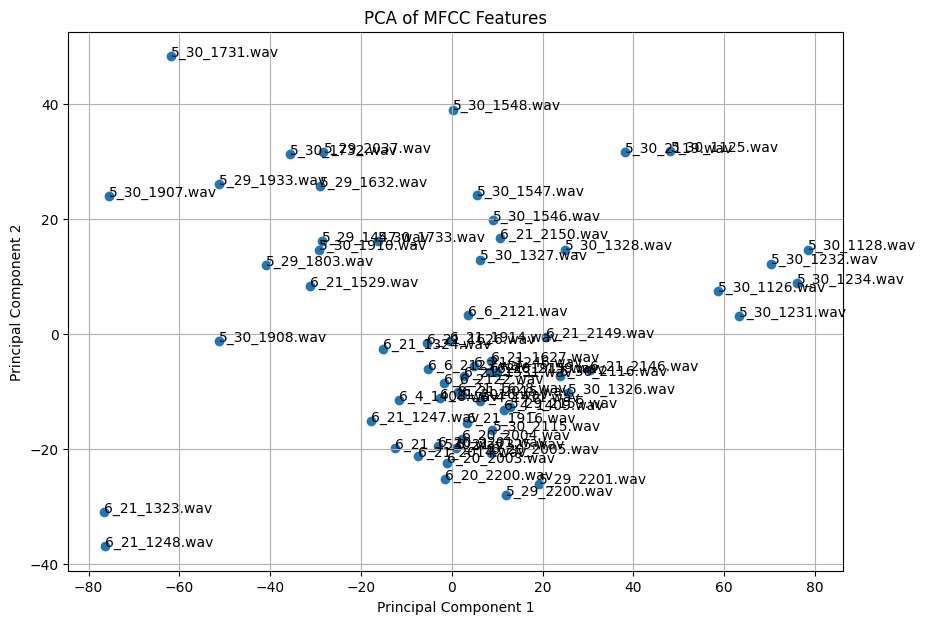

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs = np.mean(mfccs.T, axis=0)  # 平均を取って特徴量を固定長にする
    return mfccs

def process_directory(directory):
    mfcc_list = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(filename)

    return np.array(mfcc_list), labels

# MFCCを抽出
mfcc_features, labels = process_directory(directory)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1])

for i, label in enumerate(labels):
    plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.show()


### 色を時間に合わせてグラデーション変化

<ipython-input-10-b92813b751ee>:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # 色マップを選択
<ipython-input-10-b92813b751ee>:91: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')


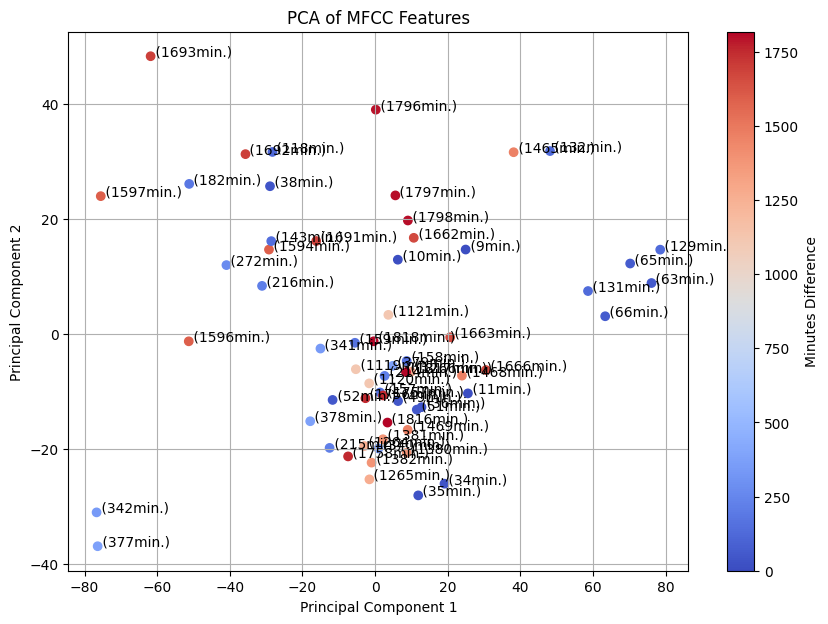

In [10]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs = np.mean(mfccs.T, axis=0)  # 平均を取って特徴量を固定長にする
    return mfccs

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = cm.get_cmap('coolwarm')  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return np.array(mfcc_list), labels, colors, norm, cmap

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap = process_directory(directory, specified_times)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors)

for i, label in enumerate(labels):
    plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')
plt.show()


<ipython-input-11-7c302ca8d748>:91: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')


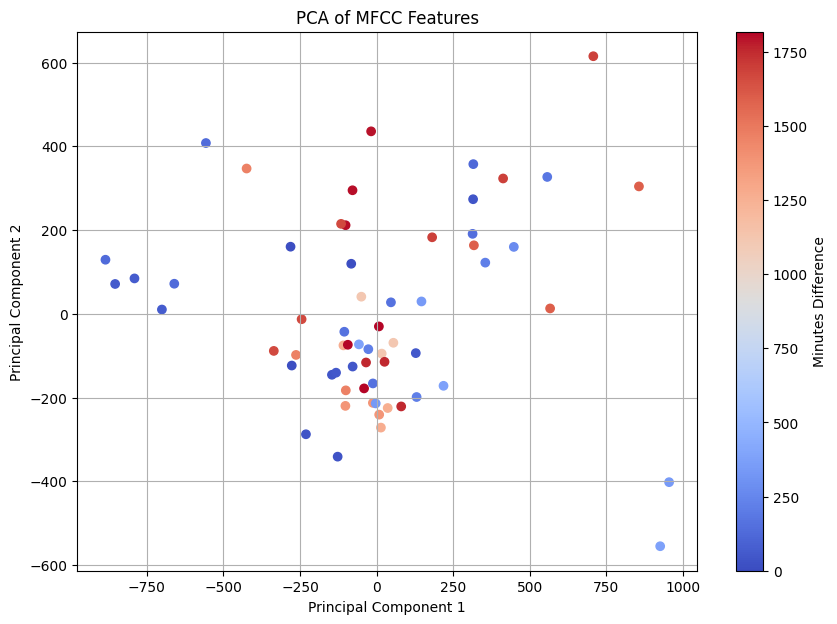

In [11]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T.flatten()  # フレームごとのMFCCを結合して1次元ベクトルに変換

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = plt.colormaps['coolwarm']  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return np.array(mfcc_list), labels, colors, norm, cmap

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap = process_directory(directory, specified_times)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors)

# プロットにラベルを追加
# for i, label in enumerate(labels):
#     plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')
plt.show()


<ipython-input-14-99d5e945ce6b>:94: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')


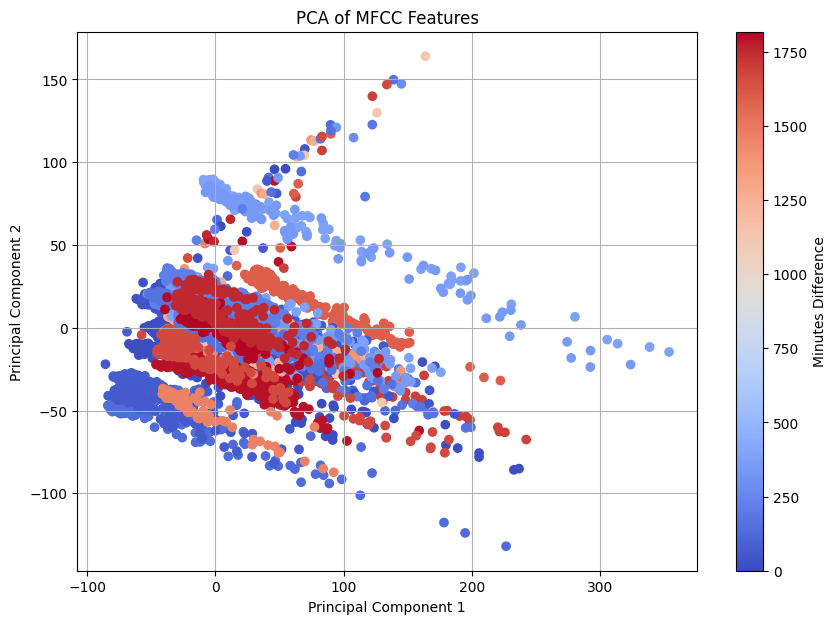

In [14]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T  # フレームごとのMFCCをそのまま返す

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=(max_minutes_difference))
    cmap = plt.colormaps['coolwarm']  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.extend([color] * len(mfcc_list[-1]))  # 各フレームに同じ色を割り当てる

    # 全てのMFCCを縦に結合
    mfcc_features = np.vstack(mfcc_list)

    return mfcc_features, labels, colors, norm, cmap

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap = process_directory(directory, specified_times)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors)

# プロットにラベルを追加
# for i, label in enumerate(labels):
#     plt.annotate(label, (mfcc_pca[i * len(mfcc_list[i]), 0], mfcc_pca[i * len(mfcc_list[i]), 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')
plt.show()
